In [1]:
# 1.SETUP AND IMPORTS

from src.download_data import download_kaggle_dataset

download_kaggle_dataset("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")


Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows


## 2.CLEAN DATA

In [2]:
from src.clean_data import clean_imdb_data

df = clean_imdb_data("data/imdb_top_1000.csv")  # Replace with your file name if different
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,Star2,Star3,No_of_Votes,Gross,Director_First
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,2343110,28341469.0,Frank
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,1620367,134966411.0,Francis
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,2303232,534858444.0,Christopher
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,1129952,57300000.0,Francis
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,689845,4360000.0,Sidney


## 3.PULL GENDERIZE API AND ADD INFORMATION TO DF

In [3]:
from src.genderize_api import get_gender_mapping

# Get or load the gender predictions
director_name_gender = get_gender_mapping(df['Director_First'].unique())

# Merge into your DataFrame
df['Director_Gender'] = df['Director_First'].map(director_name_gender)
df.head()

Loaded cached gender mapping.


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,Star2,Star3,No_of_Votes,Gross,Director_First,Director_Gender
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,2343110,28341469.0,Frank,male
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,1620367,134966411.0,Francis,male
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,2303232,534858444.0,Christopher,male
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,1129952,57300000.0,Francis,male
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,689845,4360000.0,Sidney,male


## 4.PULL OMDB DATA AND ADD ROTTEN TOMATOES SCORE TO DF

In [4]:
from src.omdb_api import get_all_movie_data, add_rotten_tomatoes_score

# Pull OMDb data (ONLY pass titles)
omdb_data = get_all_movie_data(df['Series_Title'])

# Add Rotten Tomatoes Score into DataFrame
df = add_rotten_tomatoes_score(df, omdb_data)
df.head()

Loaded cached OMDb movie data.


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,Star2,Star3,No_of_Votes,Gross,Director_First,Director_Gender,Rotten_Tomatoes_Score
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,2343110,28341469.0,Frank,male,89.0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,1620367,134966411.0,Francis,male,97.0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,2303232,534858444.0,Christopher,male,94.0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,1129952,57300000.0,Francis,male,96.0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,689845,4360000.0,Sidney,male,100.0


## 5. FINAL VISUALIZATION

/Users/katelynnyoussefyeh/gender_in_movies/src/visuals.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Director_Gender', y='Gross', palette=gender_colors)


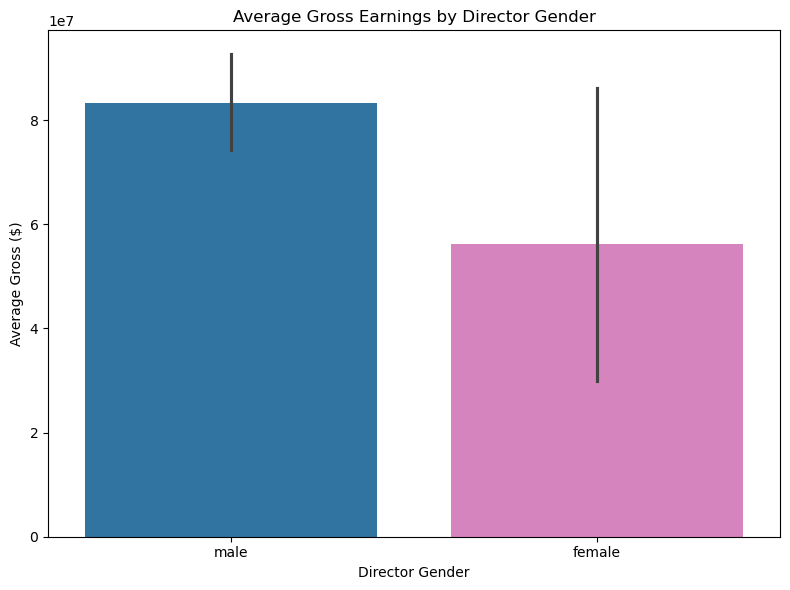

/Users/katelynnyoussefyeh/gender_in_movies/src/visuals.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Director_Gender', y='IMDB_Rating', palette=gender_colors)


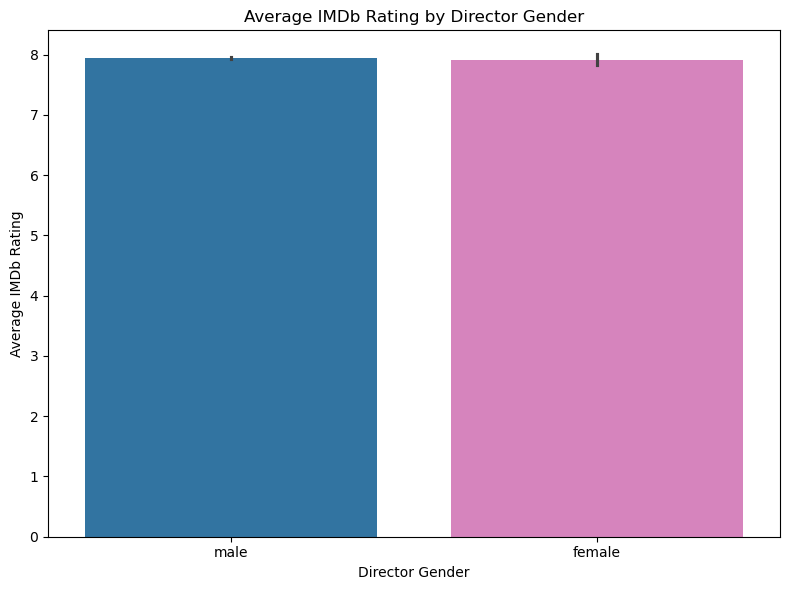

/Users/katelynnyoussefyeh/gender_in_movies/src/visuals.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Director_Gender', y='Rotten_Tomatoes_Score', palette=gender_colors)


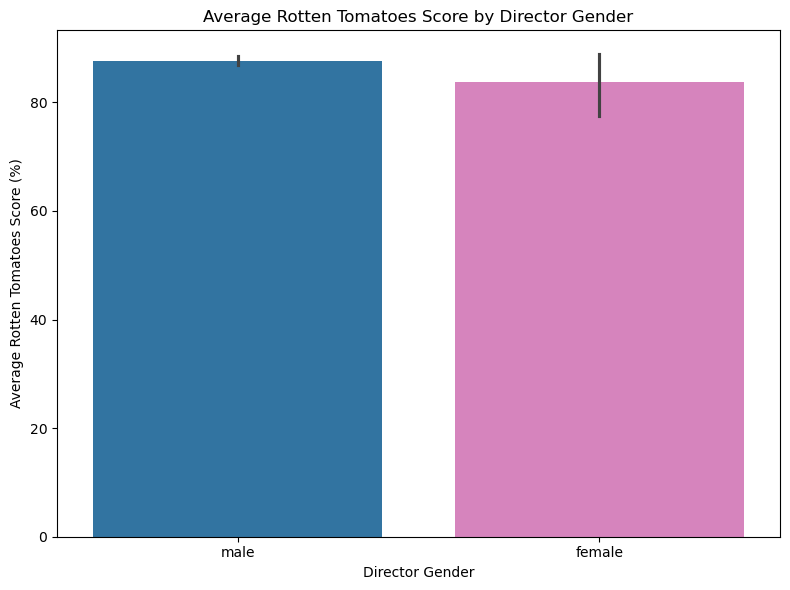

/Users/katelynnyoussefyeh/gender_in_movies/src/visuals.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Director_Gender', y='Gross', palette=gender_colors)


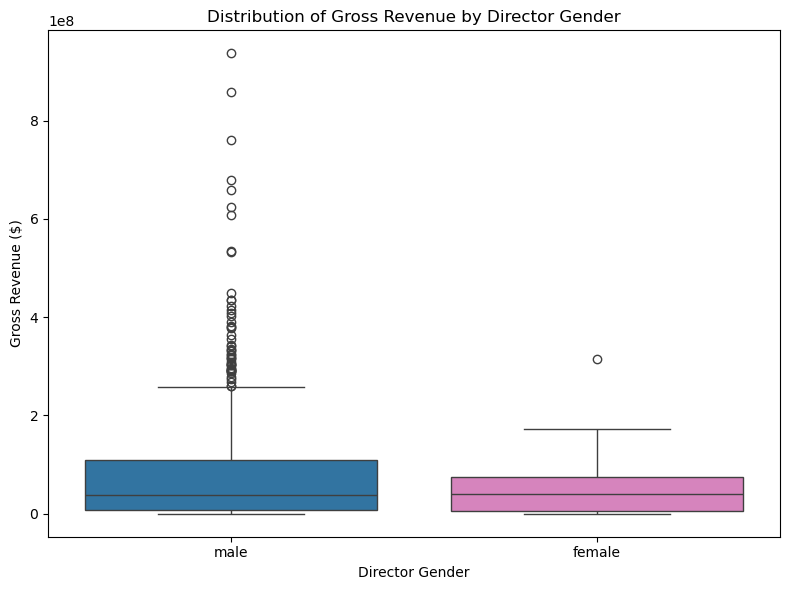

/Users/katelynnyoussefyeh/gender_in_movies/src/visuals.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Director_Gender', y='IMDB_Rating', palette=gender_colors)


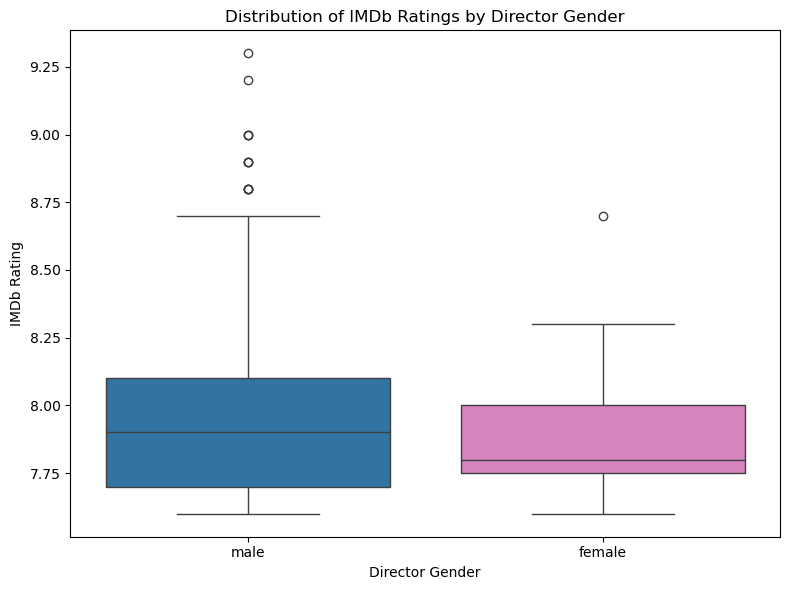

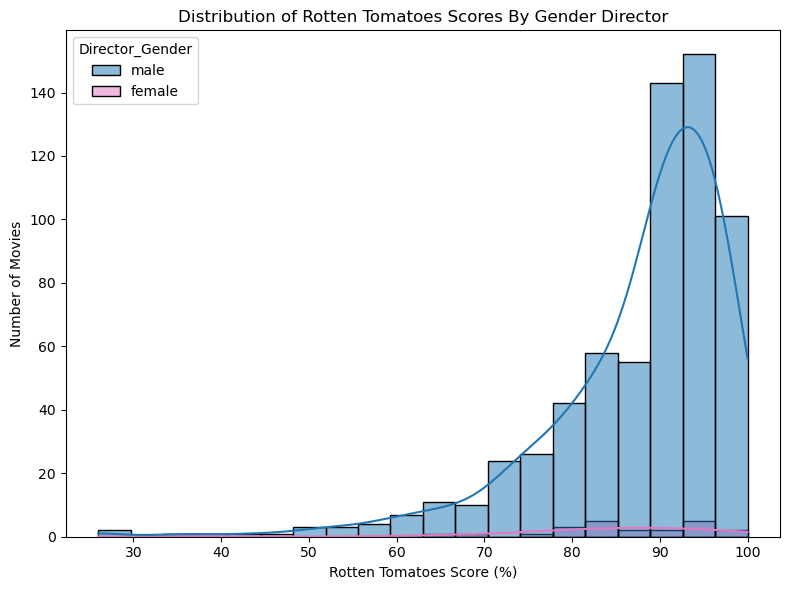

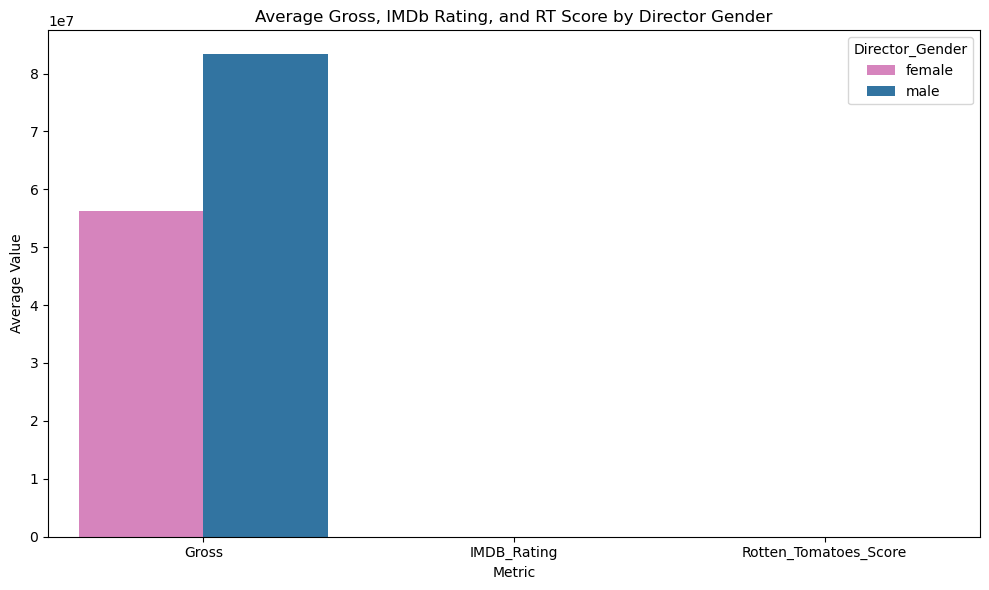

In [5]:
from src.visuals import (
    plot_gross_by_gender,
    plot_imdb_by_gender,
    plot_rotten_tomatoes_by_gender,
    
    plot_boxplot_gross_by_gender,
    plot_boxplot_imdb_by_gender,
    plot_hist_rt_scores,
    
    plot_grouped_avg_metrics_by_gender
)

plot_gross_by_gender(df)
plot_imdb_by_gender(df)
plot_rotten_tomatoes_by_gender(df)

plot_boxplot_gross_by_gender(df)
plot_boxplot_imdb_by_gender(df)
plot_hist_rt_scores(df)

plot_grouped_avg_metrics_by_gender(df)


